This notebook will be collected automatically at **6pm on Monday** from `/home/data_scientist/assignments/Week10` directory on the course JupyterHub server. If you work on this assignment on the course Jupyterhub server, just make sure that you save your work and instructors will pull your notebooks automatically after the deadline. If you work on this assignment locally, the only way to submit assignments is via Jupyterhub, and you have to place the notebook file in the correct directory with the correct file name before the deadline.

1. Make sure everything runs as expected. First, restart the kernel (in the menubar, select `Kernel` → `Restart`) and then run all cells (in the menubar, select `Cell` → `Run All`).
2. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed by the autograder.
3. Do not change the file path or the file name of this notebook.
4. Make sure that you save your work (in the menubar, select `File` → `Save and CheckPoint`)

# Problem 10.2. Graph Analysis.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_false
from numpy.testing import assert_array_equal, assert_array_almost_equal

## Zachary's Karate Club

We use [Zachary's Karete Club](https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.social.karate_club_graph.html) data set. You can read more about it on [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) or refer to the original paper [Zachary (1997)](http://www.jstor.org.proxy2.library.illinois.edu/stable/3629752).

According to Wikipedia:

<blockquote>
A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting 78 pairwise links between members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi, members from the other part found a new instructor or gave up karate. Basing on collected data Zachary assigned correctly all but one member of the club to the groups they actually joined after the split.
</blockquote>

In [2]:
g = nx.karate_club_graph()

- Use `networkx.draw()` to draw the social network of Zachary's Karate Club.

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week10/assignments/images/karate_all.png)

In [3]:
def draw_graph(graph):
    '''
    Draws the social network of Zachary's Karate club.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
           
    sns.set(style="white", font_scale=1.0)
    fig, ax = plt.subplots(figsize=(10,10))  
    nx.draw(graph, pos=nx.spring_layout(graph), node_color=sns.xkcd_rgb["faded pink"], with_labels=True) 
    
    return ax

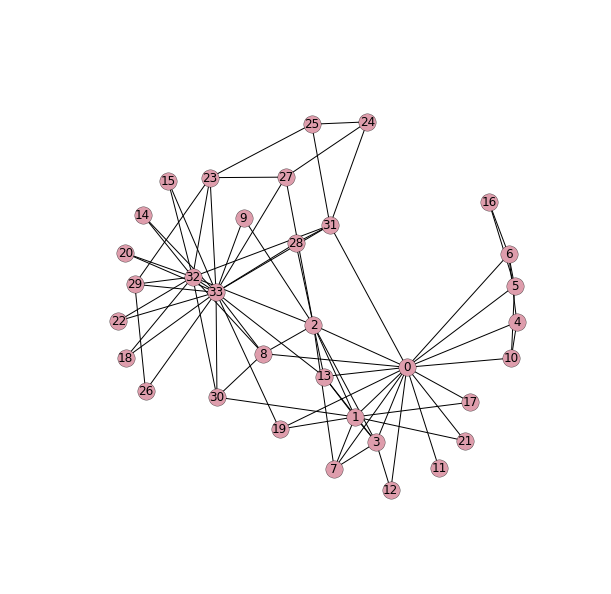

In [4]:
ax1 = draw_graph(g)
plt.show()

In [5]:
assert_is_instance(ax1, mpl.axes.Axes)
assert_equal(ax1.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax1.collections[1].get_segments()), len(g.edges()))

## Node degrees

- Compute the degree of each node.

In [6]:
def get_degree(graph):
    '''
    Computes the degree of each node.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.

    Returns
    -------
    A dict of foramt {node: degree}
    '''
    
    result ={}
    
    for node in graph.nodes():
        result[node] = graph.degree(node)

    return result

In [7]:
degree = get_degree(g)
print('Node  Degree')
for node in degree:
    print('{0:4d} {1:7d}'.format(node, degree[node]))

Node  Degree
   0      16
   1       9
   2      10
   3       6
   4       3
   5       4
   6       4
   7       4
   8       5
   9       2
  10       3
  11       1
  12       2
  13       5
  14       2
  15       2
  16       2
  17       2
  18       2
  19       3
  20       2
  21       2
  22       2
  23       5
  24       3
  25       3
  26       2
  27       4
  28       3
  29       4
  30       4
  31       6
  32      12
  33      17


In [8]:
assert_is_instance(degree, dict)
assert_equal(list(degree.keys()), list(range(34)))
assert_equal(degree[0], 16)
assert_equal(degree[1], 9)
assert_equal(degree[32], 12)
assert_equal(degree[33], 17)

We see that two people (Nodes 0 and 33) have well above the average number of degrees. Node 0 corresponds to Mr. Hi, and node 33 corresponds to John A (or "officer"). Node 32 has many friends but not as many as those two. To visualize this,

- Color each node according to whether it is a friend of node 0 or node 33. 

If someone is a friend of both 0 and 33, classify the node as a friend of node 33.

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week10/assignments/images/karate_friends.png)

We could draw the nodes, edges, and labels individually using `draw_networkx_nodes()`, `draw_networkx_edges()`, and `draw_networkx_labels()`. But I think it's simpler to draw all nodes, edges, and labels by using `draw()`, and then overwrite the nodes with different colors by using `draw_networkx_nodes()`.

In the following code cell,

- Use `networkx.draw()` to draw a graph,
- Use `networkx.draw_networkx_nodes()` to make the friends of node 0 different colors, and
- Use `networkx.draw_networkx_nodes()` to make the friends of node 33 different colors.

It is important to draw the graph in this specific order to pass the unit tests.

In [9]:
def draw_graph_friends(graph):
    '''
    Draws the social network of Zachary's Karate club,
    but uses different colors for friends of node 0 and node 33.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    sns.set(style="white", font_scale=1.0)
    fig, ax = plt.subplots(figsize=(10,10))
    
    pos=nx.spring_layout(graph)
    
    frnds00 = graph.neighbors(0)  #friends of 0
    frnds00.append(0)             #make sure 0 is included
    
    frnds33 = graph.neighbors(33) #friends of 33
    frnds33.append(33)            #make sure 33 is included
    
    #find common friends
    frndscom = [frnd for frnd in frnds00 if frnd in frnds33]

    #draw graph and color nodes based on friends
    nx.draw(graph, pos=pos, node_color=sns.xkcd_rgb["pale olive"], with_labels=True)
    nx.draw_networkx_nodes(graph, pos=pos,nodelist=frnds00, \
                           node_color=sns.xkcd_rgb["cloudy blue"], with_labels=True)
    nx.draw_networkx_nodes(graph, pos=pos,nodelist=frnds33, \
                           node_color=sns.xkcd_rgb["faded pink"], with_labels=True)
    nx.draw_networkx_nodes(graph, pos=pos,nodelist=frndscom, \
                           node_color=sns.xkcd_rgb["faded pink"], with_labels=True)
        
    return ax

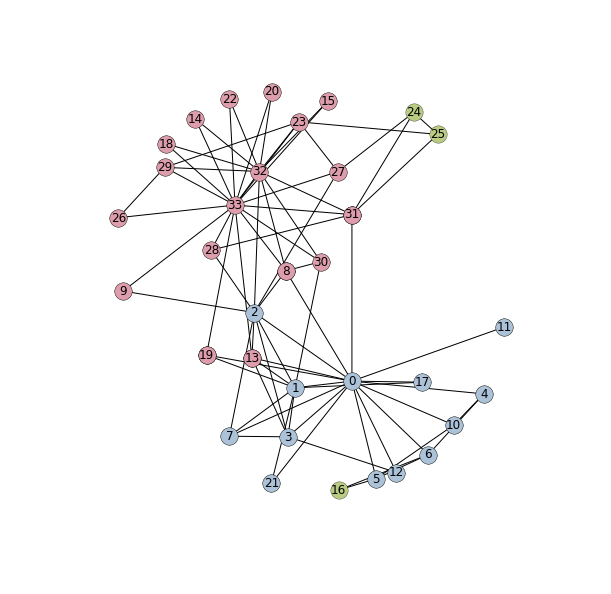

In [10]:
ax2 = draw_graph_friends(g)
plt.show()

In [11]:
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(ax2.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax2.collections[1].get_segments()), len(g.edges()))
assert_equal(len(ax2.collections[2].get_offsets()), 17)
assert_equal(len(ax2.collections[3].get_offsets()), 18)
assert_false(np.all(ax2.collections[2].get_facecolor() == ax2.collections[3].get_facecolor()))

By coloring the friends of node 0 and node 33, you can see that the club already had two subgroups based on social relationships. Let's compare the previous visualization with the visualization of the actual breakup.

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week10/assignments/images/karate_after.png)

Each node in the returned graph has a node attribute 'club' that indicates the name of the club to which the member represented by that node belongs, either 'Mr. Hi' or 'Officer'.

To get the name of the club to which a node belongs:

```python
>>> import networkx as nx
>>> G = nx.karate_club_graph()
>>> G.node[5]['club']
'Mr. Hi'
>>> G.node[9]['club']
'Officer'
```

In the following code cell,

- First, use `networkx.draw()` to draw all nodes, edges, and labels.
- Overwrite the existing nodes by using `networkx.draw_networkx_nodes()` to color the nodes according to which group it belonged to after the split. Color the nodes that belong to `Officer` first, and then color the nodes that belong to `Mr. Hi`.

It is important to draw the graph in this specific order to pass the unit tests.

In [12]:
def draw_graph_split(graph):
    '''
    Draws the social network of Zachary's Karate club,
    but uses different colors for two subgroups after the breakup.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    sns.set(style="white", font_scale=1.0)
    fig, ax = plt.subplots(figsize=(10,10))
    
    pos=nx.spring_layout(graph)
    
    #generate lists for nodes in 'Mr. Hi' or 'Officer' clubs
    clb01 = [node for node in range(0,graph.order()) if graph.node[node]['club'] == 'Mr. Hi']
    clb02 = [node for node in range(0,graph.order()) if graph.node[node]['club'] == 'Officer']
    
    #draw graph and color nodes based on club
    nx.draw(graph, pos=pos, node_color=sns.xkcd_rgb["pale olive"], with_labels=True)
    nx.draw_networkx_nodes(graph, pos=pos,nodelist=clb01, \
                           node_color=sns.xkcd_rgb["cloudy blue"], with_labels=True)
    nx.draw_networkx_nodes(graph, pos=pos,nodelist=clb02, \
                           node_color=sns.xkcd_rgb["faded pink"], with_labels=True)
    
    return ax

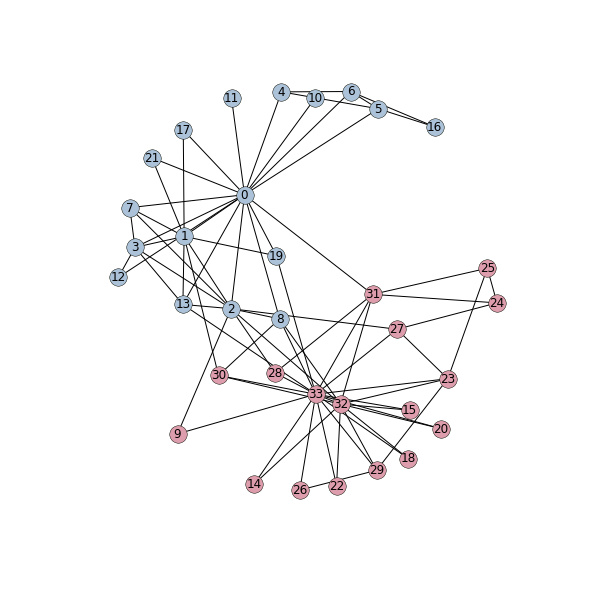

In [13]:
ax3 = draw_graph_split(g)
plt.show()

In [14]:
assert_is_instance(ax3, mpl.axes.Axes)
assert_equal(ax3.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax3.collections[1].get_segments()), len(g.edges()))
assert_equal(len(ax3.collections[2].get_offsets()), 17)
assert_equal(len(ax3.collections[3].get_offsets()), 17)
assert_false(np.all(ax3.collections[2].get_facecolor() == ax3.collections[3].get_facecolor()))